In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os

In [2]:
# shortcut for data import
path = r'/Users/sydneyhoy/Documents/Data Immersion/Achievement 4/02-2024 Instacart Basket Analysis'

In [3]:
# import daraframe orders
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'), index_col = False)

In [4]:
df_ords.shape

(3421083, 7)

In [4]:
df_ords_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders_products_prior.csv'), index_col = False)

In [6]:
df_ords_prods.shape

(32434489, 4)

In [5]:
instacart_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final.pkl'))

In [7]:
instacart_final['departments'].value_counts(dropna = False)

departments
produce            8608701
dairy eggs         4909353
snacks             2620533
beverages          2437586
frozen             1996444
pantry             1681391
bakery             1060612
canned goods        954449
deli                947553
dry goods pasta     773993
household           658975
meat seafood        637276
breakfast           633469
personal care       399739
babies              391707
international       240869
alcohol             134867
pets                 87805
missing              63389
other                32572
bulk                 31998
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


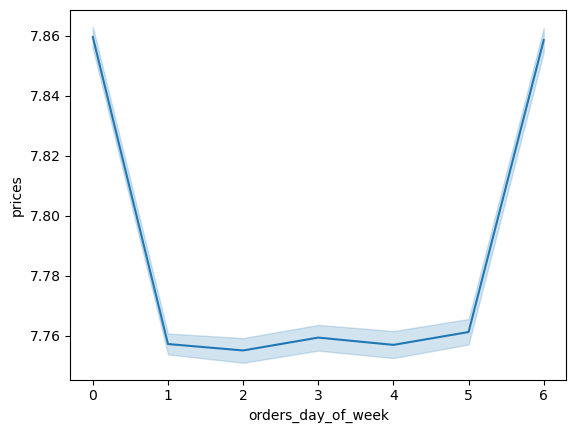

In [10]:
line_orders_hour_of_day_prices = sns.lineplot(data = instacart_final, x = 'orders_day_of_week',y = 'prices')

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


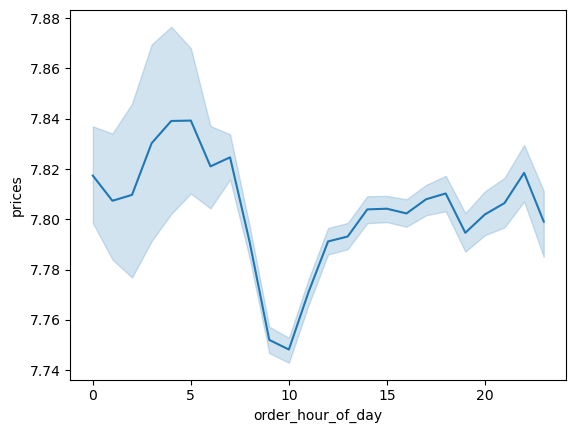

In [15]:
line_orders_hour_of_day_prices = sns.lineplot(data = instacart_final, x = 'order_hour_of_day',y = 'prices')

In [14]:
instacart_final['order_hour_of_day'].dtype

dtype('int8')

In [16]:
line_orders_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_hour_of_day_prices.png'))

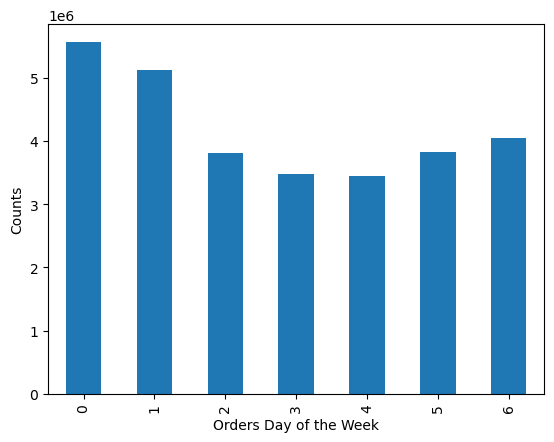

In [20]:
bar = instacart_final['orders_day_of_week'].value_counts().sort_index().plot.bar(ylabel = 'Counts', xlabel = 'Orders Day of the Week')

In [22]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prices_dow.png'))

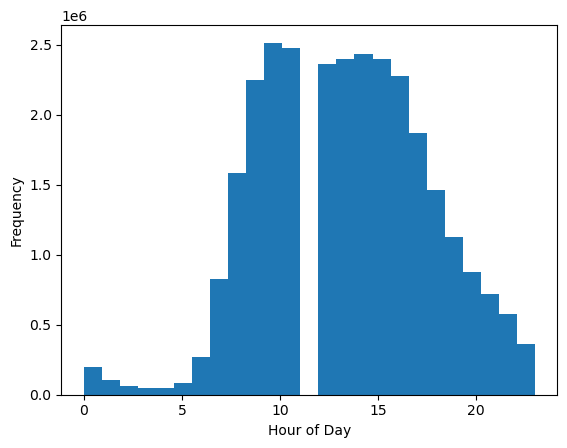

In [25]:
hist_order_hour_of_day = instacart_final['order_hour_of_day'].plot.hist(bins = 25, xlabel = 'Hour of Day')

In [26]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders2.png'))

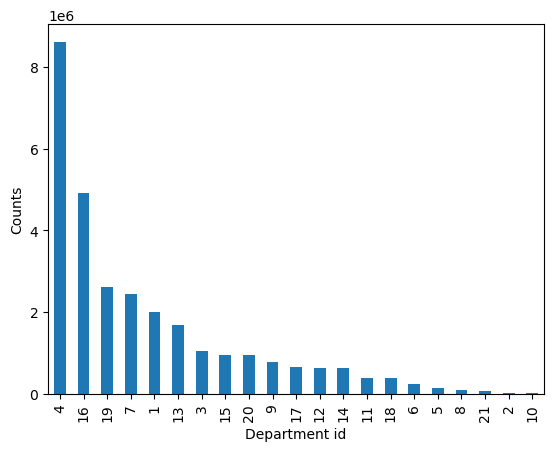

In [28]:
bar_departments = instacart_final['department_id'].value_counts().plot.bar(xlabel = 'Department id', ylabel = 'Counts')

In [33]:
bar_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments.png'))

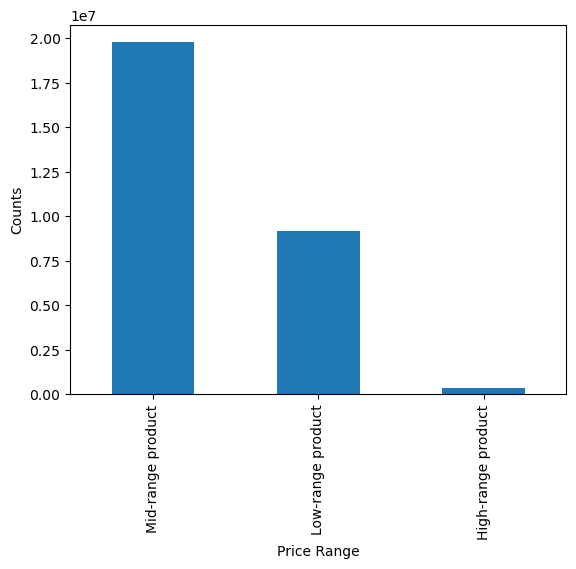

In [35]:
bar_price_range = instacart_final['price_range_loc'].value_counts().plot.bar(xlabel = 'Price Range', ylabel = 'Counts')

In [36]:
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [39]:
crosstab = instacart_final.groupby('loyalty_flag'). agg({'days_since_prior_order' : ['mean', 'min', 'max']})

In [40]:
crosstab.to_clipboard()

In [41]:
crosstab

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 6.026656  0.0  30.0
New customer                  17.598692  0.0  30.0
Regular customer              12.155136  0.0  30.0

In [42]:
bar_price_range = instacart_final['price_range_loc'].value_counts().plot.bar(xlabel = 'Price Range', ylabel = 'Counts')

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.774068  1.0  25.0
New customer      7.803113  1.0  25.0
Regular customer  7.799374  1.0  25.0

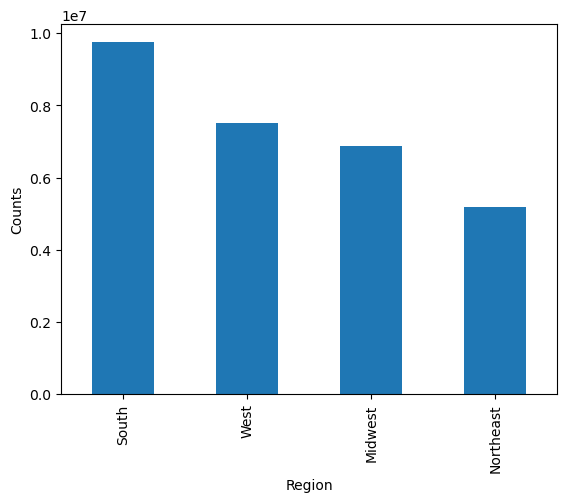

In [53]:
bar_region = instacart_final['Region'].value_counts().plot.bar(xlabel = 'Region', ylabel = 'Counts')

In [ ]:
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [46]:
instacart_final.groupby('Region'). agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
Region                                     
Midwest                10.892735  0.0  30.0
Northeast              10.774220  0.0  30.0
South                  10.814227  0.0  30.0
West                   10.754622  0.0  30.0

In [60]:
instacart_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_order',
       'spending_flag', 'median_order_frequency', 'order_frequency', 'Gender',
       'State', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'Region', 'customer activity', 'Dependants', 'Income Range',
       'Income Profile', 'Family Profile', 'Age Profile', 'departments'],
      dtype='object')

In [66]:
instacart_final['user_id'] = instacart_final['user_id'].astype('object')

In [67]:
instacart_final['user_id'].dtype

dtype('O')

In [9]:
instacart_final.dtypes

order_id                    int64
user_id                     int32
order_number                 int8
orders_day_of_week           int8
order_hour_of_day            int8
days_since_prior_order    float16
product_id                  int32
add_to_cart_order           int16
reordered                    int8
product_name               object
aisle_id                    int16
department_id                int8
prices                    float32
price_range_loc            object
busiest_days               object
busiest_period_of_day      object
max_order                    int8
loyalty_flag               object
avg_order                 float16
spending_flag              object
median_order_frequency    float16
order_frequency            object
Gender                     object
State                      object
Age                          int8
date_joined                object
n_dependants                 int8
fam_status                 object
income                      int32
Region        

In [10]:
df = pd.DataFrame(instacart_final, columns=['Age Profile', 'Midwest', 'West', 'Northeast', 'South'])

In [16]:
instacart_final['Region'].value_counts(dropna = False)

Region
South        9756873
West         7505128
Midwest      6868419
Northeast    5172861
Name: count, dtype: int64

In [21]:
instacart_final_region = instacart_final.groupby(['Region']).agg({'prices' : ['sum']})

In [22]:
instacart_final_region = instacart_final_region.loc[instacart_final_region.sum(axis = 1).sort_values(ascending = True).index]

In [23]:
instacart_final_region

,prices
,sum
Region,
Northeast,40248640.0
Midwest,53512240.0
West,58463572.0
South,76046912.0


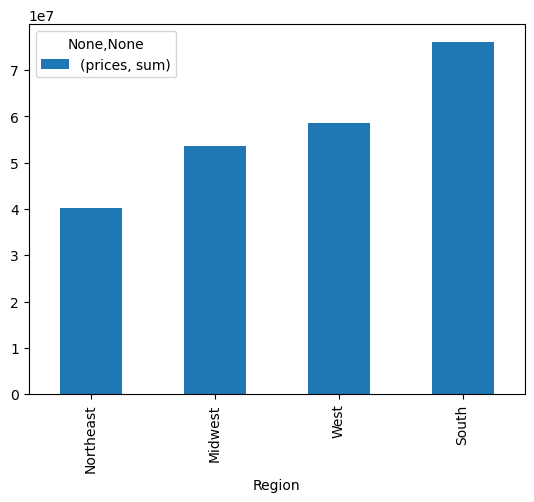

In [24]:
bar_instacart_final_region = instacart_final_region.plot(kind="bar", stacked=False)

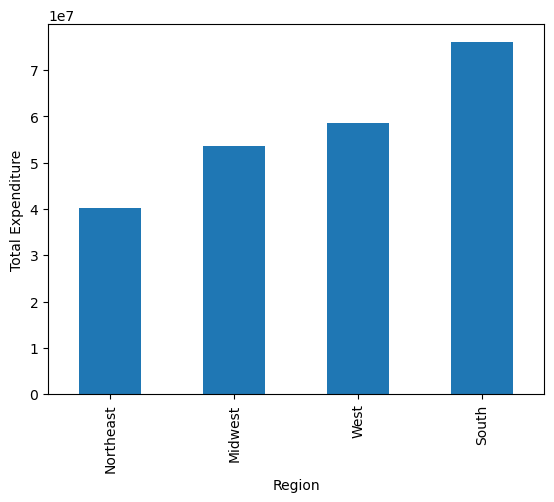

In [31]:
bar_instacart_final_region2 = instacart_final_region.plot(kind="bar", legend=False, ylabel = 'Total Expenditure')

In [32]:
bar_instacart_final_region2 .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_prices.png'))

In [34]:
instacart_final['spending_flag'].value_counts(dropna=False)

spending_flag
Low spender     28733007
High spender      570274
Name: count, dtype: int64

In [7]:
instacart_final_spending = instacart_final.groupby(['Region', 'spending_flag'])

In [8]:
instacart_final_spending = pd.crosstab(instacart_final['Region'], instacart_final['spending_flag'], dropna = False)

In [9]:
instacart_final_spending

spending_flag,High spender,Low spender
Region,,
Midwest,141529,6726890
Northeast,98099,5074762
South,187783,9569090
West,142863,7362265


In [11]:
instacart_final_orders_region = instacart_final.groupby(['Region', 'orders_day_of_week'])

In [13]:
instacart_final_orders_region

In [14]:
instacart_final_orders_region = pd.crosstab(instacart_final['Region'], instacart_final['orders_day_of_week'], dropna = False)

In [15]:
instacart_final_orders_region

orders_day_of_week,0,1,2,3,4,5,6
Region,,,,,,,
Midwest,1309743,1195866,898489,810411,807683,894833,951394
Northeast,983660,905534,675087,615775,605320,680757,706728
South,1841610,1712321,1269676,1164894,1144985,1274868,1348519
West,1433286,1311879,970812,887594,883703,979559,1038295


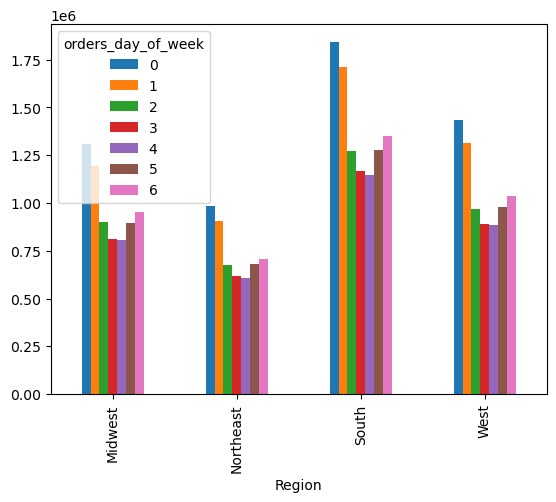

In [17]:
bar_instacart_final_orders_region = instacart_final_orders_region.plot(kind="bar", stacked=False)

In [22]:
bar_instacart_final_orders_region .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_region.png'))

In [24]:
instacart_final_hour_region = pd.crosstab(instacart_final['Region'], instacart_final['order_hour_of_day'], dropna = False)

In [25]:
instacart_final_hour_region

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,45428,24239,15200,10533,11378,18025,62149,193076,366349,524391,...,563495,565587,536590,439839,347692,264864,208188,171766,136726,83230
Northeast,34236,19281,11014,8338,8303,13953,46843,147251,280427,393871,...,431234,422224,401040,328550,256217,195419,153541,127348,102863,68141
South,65643,34079,19245,15613,16096,28235,91271,274775,533270,753090,...,806173,795257,755350,621417,485697,377820,291227,242111,189174,121847
West,50584,25861,15877,11500,11689,19969,67861,209159,400616,575227,...,629992,614420,585692,479196,371292,285504,225254,181776,144455,90127


In [31]:
age_profile_crosstab = pd.crosstab(instacart_final['Age Profile'], instacart_final['loyalty_flag'], dropna = False)

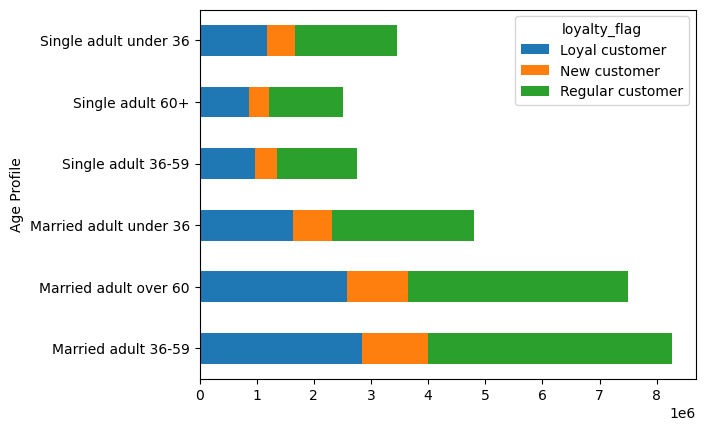

In [32]:
bar_age_profile_crosstab = age_profile_crosstab.plot(kind="barh", stacked=True)

In [33]:
age_profile_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
Age Profile,,,
Married adult 36-59,2847784,1159026,4260067
Married adult over 60,2583542,1070479,3846891
Married adult under 36,1638678,674543,2494732
Single adult 36-59,977066,383360,1400295
Single adult 60+,866431,346819,1290864
Single adult under 36,1181880,491982,1788842


In [34]:
bar_age_profile_crosstab .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_age.png'))

In [39]:
age_profile_income_crosstab = pd.crosstab(instacart_final['Age Profile'], instacart_final['Income Range'], dropna = False)

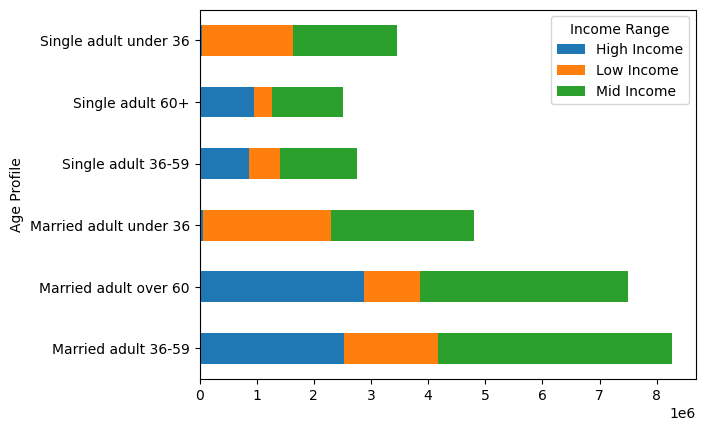

In [40]:
bar_age_profile_income_crosstab = age_profile_income_crosstab.plot(kind="barh", stacked=True)

In [41]:
age_profile_income_crosstab = pd.crosstab(instacart_final['Family Profile'], instacart_final['Income Range'], dropna = False)

In [64]:
bar_age_profile_income_crosstab .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age.png'))

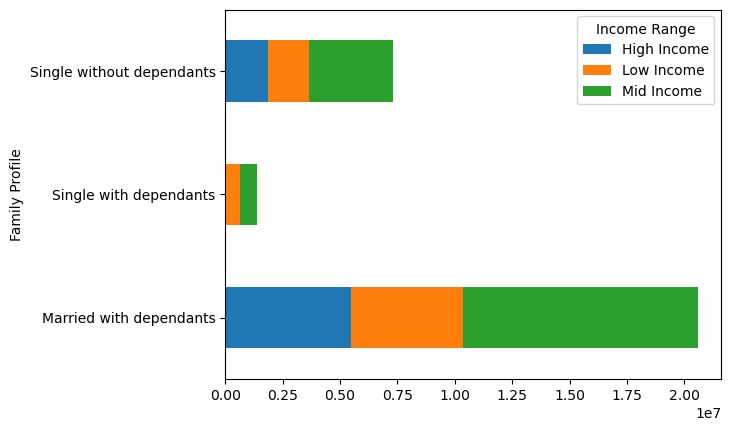

In [42]:
bar_family_profile_income_crosstab = age_profile_income_crosstab.plot(kind="barh", stacked=True)

In [65]:
bar_family_profile_income_crosstab .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_income.png'))

In [45]:
instacart_final.groupby('Age Profile'). agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                         mean  min   max
Age Profile                                             
Married adult 36-59                 10.823263  0.0  30.0
Married adult over 60               10.817469  0.0  30.0
Married adult under 36              10.822084  0.0  30.0
Single adult 36-59                  10.750359  0.0  30.0
Single adult 60+                    10.750328  0.0  30.0
Single adult under 36               10.838621  0.0  30.0

In [46]:
instacart_final.groupby('Family Profile'). agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                            mean  min   max
Family Profile                                             
Married with dependants                10.820875  0.0  30.0
Single with dependants                 10.750995  0.0  30.0
Single without dependants              10.791950  0.0  30.0

In [47]:
instacart_final.groupby('Income Profile'). agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                                        mean  min   max
Income Profile                                                         
High income married with dependants                10.784738  0.0  30.0
High income single with dependants                  9.178224  0.0  30.0
High income single without dependants              10.686953  0.0  30.0
Low income married with dependants                 10.959281  0.0  30.0
Low income single with dependants                  10.930418  0.0  30.0
Low income single without dependants               10.982260  0.0  30.0
Mid income married with dependants                 10.774344  0.0  30.0
Mid income single with dependants                  10.637066  0.0  30.0
Mid income single without dependants               10.749796  0.0  30.0

In [48]:
instacart_final.groupby('Family Profile'). agg({'prices' : ['mean', 'min', 'max']})

prices           
                               mean  min   max
Family Profile                                
Married with dependants    7.790586  1.0  25.0
Single with dependants     7.801433  1.0  25.0
Single without dependants  7.790889  1.0  25.0

In [57]:
instacart_final_family = instacart_final.groupby(['Family Profile']).agg({'prices' : ('sum','mean','min','max')})

In [55]:
instacart_final_family

prices                     
                                   sum      mean  min   max
Family Profile                                             
Married with dependants    160271312.0  7.790586  1.0  25.0
Single with dependants      10941276.0  7.801433  1.0  25.0
Single without dependants   57058768.0  7.790889  1.0  25.0

In [61]:
instacart_final_age = instacart_final.groupby(['Age Profile']).agg({'prices' : ('sum','mean','min','max')})

In [59]:
instacart_final_age

prices                     
                               sum      mean  min   max
Age Profile                                            
Married adult 36-59     64410808.0  7.792687  1.0  25.0
Married adult over 60   58452316.0  7.793879  1.0  25.0
Married adult under 36  37408196.0  7.781839  1.0  25.0
Single adult 36-59      21493100.0  7.786418  1.0  25.0
Single adult 60+        19536336.0  7.802983  1.0  25.0
Single adult under 36   26970610.0  7.789980  1.0  25.0

In [62]:
instacart_final_income = instacart_final.groupby(['Income Profile']).agg({'prices' : ('sum','mean','min','max')})

In [63]:
instacart_final_income

prices                     
                                              sum      mean  min   max
Income Profile                                                        
High income married with dependants    43469608.0  7.954995  1.0  25.0
High income single with dependants       135234.5  7.951696  1.0  25.0
High income single without dependants  14612962.0  7.939062  1.0  25.0
Low income married with dependants     35371908.0  7.263730  1.0  25.0
Low income single with dependants       4788002.0  7.599786  1.0  25.0
Low income single without dependants   13340546.0  7.305329  1.0  25.0
Mid income married with dependants     81429808.0  7.953428  1.0  25.0
Mid income single with dependants       6018039.5  7.966218  1.0  25.0
Mid income single without dependants   29105260.0  7.958778  1.0  25.0